## Depth Analysis of Engine Evaluations

### Import packages and dataset

In [114]:
import pandas as pd
import os

In [115]:
print(os.getcwd())

/Users/langsong/Desktop/Guess-The-Elo/data_analysis


In [116]:
df_20 = pd.read_csv('/Users/langsong/Desktop/Guess-The-Elo/Analyzed_Games/depth20_20_analyzed.csv')
df_14 = pd.read_csv('/Users/langsong/Desktop/Guess-The-Elo/Analyzed_Games/depth20_14_analyzed.csv')
df_15 = pd.read_csv('/Users/langsong/Desktop/Guess-The-Elo/Analyzed_Games/depth20_15_analyzed.csv')

In [117]:
df_20.head()

,GameID,WhiteName,WhiteElo,BlackName,BlackElo,WhiteFideId,BlackFideId,Year,Opening,Variation,Result,MoveNumber,Move,Evaluation
0,1.0,"Sjugirov,S",2625.0,"Yuffa,D",2345.0,4189302.0,24131423.0,2012.0,Sicilian,Unknown,1-0,1.0,e4,0.2
1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,c5,0.37
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,Nf3,0.31
3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,d6,0.27
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,c3,-0.08


### Cleaning data, leaving only the evaluation column

In [118]:
# Drop rows where all values are NaN
df_14 = df_14.dropna(how='all').reset_index(drop=True)
df_15 = df_15.dropna(how='all').reset_index(drop=True)
df_20 = df_20.dropna(how='all').reset_index(drop=True)

In [119]:
# Keep only relevant columns from each DataFrame
df_14 = df_14[['GameID', 'MoveNumber', 'Evaluation']].rename(columns={'Evaluation': 'Evaluation_14'})
df_15 = df_15[['GameID', 'MoveNumber', 'Evaluation']].rename(columns={'Evaluation': 'Evaluation_15'})
df_20 = df_20[['GameID', 'MoveNumber', 'Evaluation']].rename(columns={'Evaluation': 'Evaluation_20'})

# Merge all three DataFrames on 'GameID' and 'MoveNumber'
df_merged = pd.merge(df_14, df_15, on=['GameID', 'MoveNumber'], how='inner')
df_merged = pd.merge(df_merged, df_20, on=['GameID', 'MoveNumber'], how='inner')

# Display the merged DataFrame
print(df_merged.head())
print(df_merged.shape)

   GameID  MoveNumber Evaluation_14 Evaluation_15 Evaluation_20
0     1.0         1.0          0.35          0.35           0.2
1     1.0         2.0          0.35          0.28          0.37
2     1.0         3.0           0.4          0.35          0.31
3     1.0         4.0          0.37          0.31          0.27
4     1.0         5.0          0.04           0.0         -0.08
(15000, 5)


In [120]:
# Filter out mate evaluations (those starting with 'M' and '-M)
df_filtered = df_merged[
    ~df_merged['Evaluation_14'].astype(str).str.contains('^-?M') &  # Filters both 'M' and '-M'
    ~df_merged['Evaluation_15'].astype(str).str.contains('^-?M') &
    ~df_merged['Evaluation_20'].astype(str).str.contains('^-?M')
]

print(f"Filtered DataFrame shape: {df_filtered.shape}")

Filtered DataFrame shape: (14941, 5)


In [121]:
# Convert the filtered evaluation columns to float
df_filtered['Evaluation_14'] = pd.to_numeric(df_filtered['Evaluation_14'], errors='coerce')
df_filtered['Evaluation_15'] = pd.to_numeric(df_filtered['Evaluation_15'], errors='coerce')
df_filtered['Evaluation_20'] = pd.to_numeric(df_filtered['Evaluation_20'], errors='coerce')

/var/folders/px/bhw6fd6j3kq_n8m44kf4rlbh0000gn/T/ipykernel_13805/3104242942.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Evaluation_14'] = pd.to_numeric(df_filtered['Evaluation_14'], errors='coerce')
/var/folders/px/bhw6fd6j3kq_n8m44kf4rlbh0000gn/T/ipykernel_13805/3104242942.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Evaluation_15'] = pd.to_numeric(df_filtered['Evaluation_15'], errors='coerce')
/var/folders/px/bhw6fd6j3kq_n8m44kf4rlbh0000gn/T/ipykernel_13805/3104242

### Depth Analysis on the evalution values

In [122]:
print("Evaluation at Depth 14:")
print(df_filtered['Evaluation_14'].describe())

print("\nEvaluation at Depth 15:")
print(df_filtered['Evaluation_15'].describe())

print("\nEvaluation at Depth 20:")
print(df_filtered['Evaluation_20'].describe())

# Calculate and print the averages
avg_14 = df_filtered['Evaluation_14'].mean()
avg_15 = df_filtered['Evaluation_15'].mean()
avg_20 = df_filtered['Evaluation_20'].mean()

print(f"\nAverage Evaluation at Depth 14: {avg_14}")
print(f"Average Evaluation at Depth 15: {avg_15}")
print(f"Average Evaluation at Depth 20: {avg_20}")

Evaluation at Depth 14:
count    14941.000000
mean         0.239392
std          1.677674
min         -9.820000
25%         -0.100000
50%          0.200000
75%          0.610000
max         10.210000
Name: Evaluation_14, dtype: float64

Evaluation at Depth 15:
count    14941.000000
mean         0.238671
std          1.714107
min        -10.670000
25%         -0.090000
50%          0.200000
75%          0.600000
max          8.870000
Name: Evaluation_15, dtype: float64

Evaluation at Depth 20:
count    14941.000000
mean         0.241428
std          1.992975
min        -16.100000
25%         -0.070000
50%          0.170000
75%          0.580000
max         12.280000
Name: Evaluation_20, dtype: float64

Average Evaluation at Depth 14: 0.23939227628672777
Average Evaluation at Depth 15: 0.23867144100127166
Average Evaluation at Depth 20: 0.24142761528679474


In [123]:
# Calculate evaluation difference between different depth
df_filtered['Diff_14_15'] = df_filtered['Evaluation_15'] - df_filtered['Evaluation_14']
df_filtered['Diff_20_14'] = df_filtered['Evaluation_20'] - df_filtered['Evaluation_14']
df_filtered['Diff_20_15'] = df_filtered['Evaluation_20'] - df_filtered['Evaluation_15']

/var/folders/px/bhw6fd6j3kq_n8m44kf4rlbh0000gn/T/ipykernel_13805/942725349.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Diff_14_15'] = df_filtered['Evaluation_15'] - df_filtered['Evaluation_14']
/var/folders/px/bhw6fd6j3kq_n8m44kf4rlbh0000gn/T/ipykernel_13805/942725349.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Diff_20_14'] = df_filtered['Evaluation_20'] - df_filtered['Evaluation_14']
/var/folders/px/bhw6fd6j3kq_n8m44kf4rlbh0000gn/T/ipykernel_13805/942725349.py:4: S

In [124]:
# Summary statistics of the differences
print("\nDifference between Depth 15 and 14:")
print(df_filtered['Diff_14_15'].describe())

print("\nDifference between Depth 20 and 14:")
print(df_filtered['Diff_20_14'].describe())

print("\nDifference between Depth 20 and 15:")
print(df_filtered['Diff_20_15'].describe())


Difference between Depth 15 and 14:
count    14941.000000
mean        -0.000721
std          0.213928
min         -3.900000
25%         -0.080000
50%          0.000000
75%          0.080000
max          2.420000
Name: Diff_14_15, dtype: float64

Difference between Depth 20 and 14:
count    14941.000000
mean         0.002035
std          0.483991
min         -7.060000
25%         -0.110000
50%          0.000000
75%          0.100000
max          6.680000
Name: Diff_20_14, dtype: float64

Difference between Depth 20 and 15:
count    14941.000000
mean         0.002756
std          0.437412
min         -7.180000
25%         -0.090000
50%          0.000000
75%          0.090000
max          7.650000
Name: Diff_20_15, dtype: float64


### Some plots

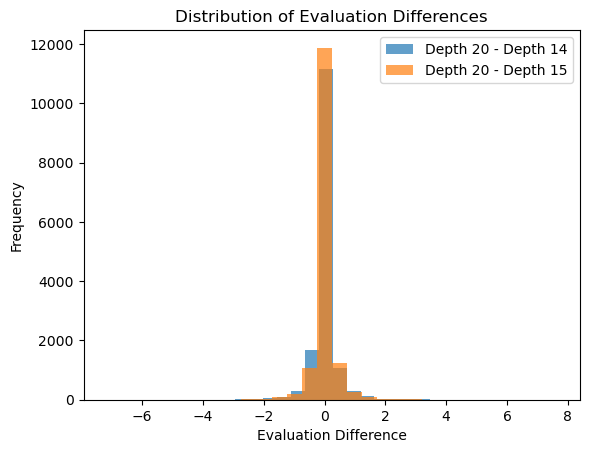

In [125]:
import matplotlib.pyplot as plt

# Histogram of evaluation differences
plt.hist(df_filtered['Diff_20_14'], bins=30, alpha=0.7, label='Depth 20 - Depth 14')
plt.hist(df_filtered['Diff_20_15'], bins=30, alpha=0.7, label='Depth 20 - Depth 15')
plt.xlabel('Evaluation Difference')
plt.ylabel('Frequency')
plt.title('Distribution of Evaluation Differences')
plt.legend()
plt.show()

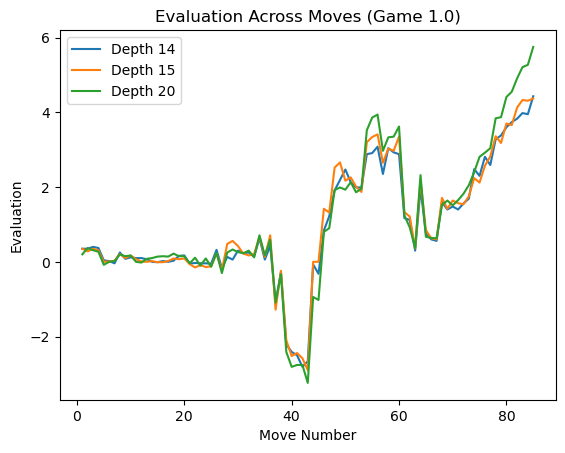

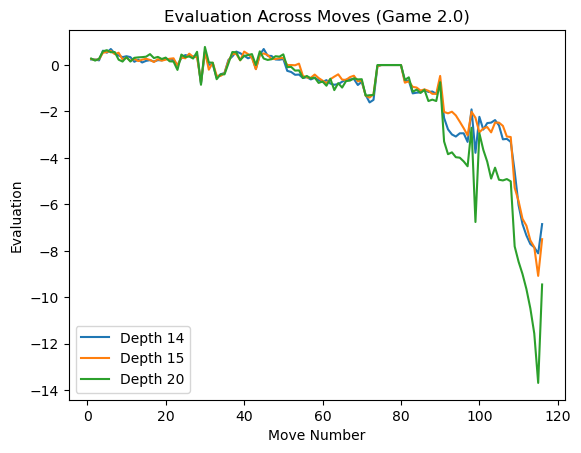

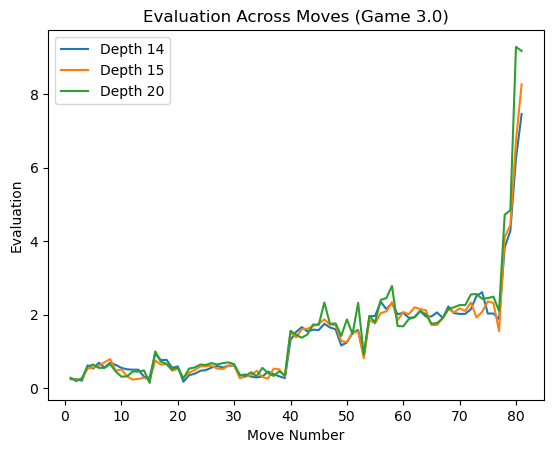

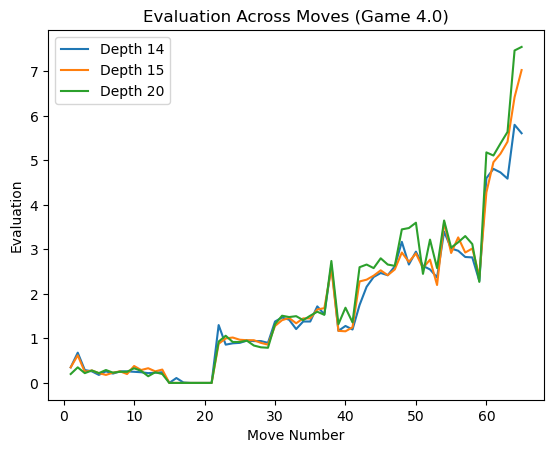

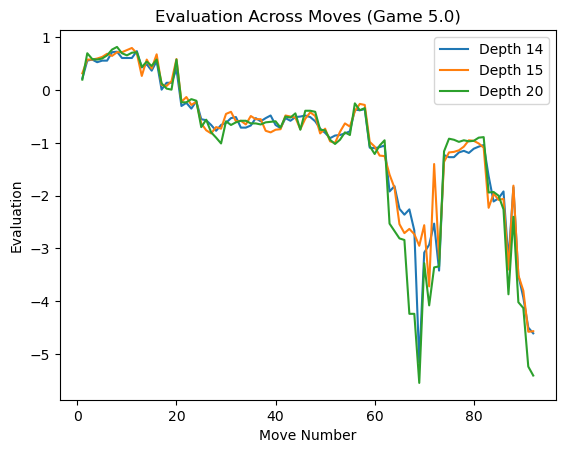

In [126]:
for game_id in df_filtered['GameID'].unique()[:5]:  # Plot for the first 5 games
    game_data = df_filtered[df_filtered['GameID'] == game_id]
    plt.plot(game_data['MoveNumber'], game_data['Evaluation_14'], label='Depth 14')
    plt.plot(game_data['MoveNumber'], game_data['Evaluation_15'], label='Depth 15')
    plt.plot(game_data['MoveNumber'], game_data['Evaluation_20'], label='Depth 20')
    plt.xlabel('Move Number')
    plt.ylabel('Evaluation')
    plt.title(f'Evaluation Across Moves (Game {game_id})')
    plt.legend()
    plt.show()


### Difference between depeth 20 and 15

In [144]:
# Find moves where the difference between Depth 20 and 15 is large
large_diff_moves = df_filtered[df_filtered['Diff_20_15'].abs() > 1.5]  # Threshold of 1.5 pawn

print("Moves with large differences between Depth 20 and 15:")
print(large_diff_moves[['GameID', 'MoveNumber', 'Evaluation_15', 'Evaluation_20', 'Diff_20_15']])

Moves with large differences between Depth 20 and 15:
       GameID  MoveNumber  Evaluation_15  Evaluation_20  Diff_20_15
176       2.0        92.0          -2.08          -3.84        1.76
177       2.0        93.0          -2.01          -3.76        1.75
178       2.0        94.0          -2.17          -3.97        1.80
179       2.0        95.0          -2.44          -3.99        1.55
183       2.0        99.0          -2.27          -6.76        4.49
...       ...         ...            ...            ...         ...
13962   166.0        64.0           3.35           5.14        1.79
14221   169.0        80.0           4.15           5.99        1.84
14335   171.0        39.0           0.86          -0.93        1.79
14364   171.0        68.0          -3.35          -4.98        1.63
14365   171.0        69.0          -3.50          -5.15        1.65

[221 rows x 5 columns]


In [137]:
#Filter those large-difference moves where the evaluations are in a sensitive range
significant_moves = large_diff_moves[
    (large_diff_moves['Evaluation_15'].abs() <= 2.5) &
    (large_diff_moves['Evaluation_20'].abs() <= 2.5)
]

print("Significant large difference moves (evaluations ≤ 2.0):")
print(significant_moves[['GameID', 'MoveNumber', 'Evaluation_15', 'Evaluation_20', 'Diff_20_15']])

num_significant_moves = significant_moves.shape[0]
print(f"Total number of significant large difference moves: {num_significant_moves}")

Significant large difference moves (evaluations ≤ 2.0):
       GameID  MoveNumber  Evaluation_15  Evaluation_20  Diff_20_15
6428     74.0        35.0           0.93           2.47        1.54
8229     98.0       108.0           0.24           1.99        1.75
8230     98.0       109.0           0.62           2.15        1.53
10263   121.0        66.0           2.10           0.11        1.99
14335   171.0        39.0           0.86          -0.93        1.79
Total number of significant large difference moves: 5


In [140]:
df_filtered['Diff_20_15'] = (df_filtered['Evaluation_20'] - df_filtered['Evaluation_15']).abs()
games_with_large_diff = df_filtered[df_filtered['Diff_20_15'] > 1.5]['GameID'].unique()
num_games_with_large_diff = len(games_with_large_diff)
print(f"Number of games with at least one move having >1.5 evaluation difference: {num_games_with_large_diff}")


Number of games with at least one move having >1.5 evaluation difference: 50


/var/folders/px/bhw6fd6j3kq_n8m44kf4rlbh0000gn/T/ipykernel_13805/2101266949.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Diff_20_15'] = (df_filtered['Evaluation_20'] - df_filtered['Evaluation_15']).abs()


### Difference between depth 14 and 15

In [147]:
# Find moves where the difference between Depth 14 and 15 is large
large_diff_moves_2 = df_filtered[df_filtered['Diff_14_15'].abs() > 1.5]  # Threshold of 1.5 pawn

print("Moves with large differences between Depth 14 and 15:")
print(large_diff_moves_2[['GameID', 'MoveNumber', 'Evaluation_14', 'Evaluation_15', 'Diff_14_15']])

Moves with large differences between Depth 14 and 15:
       GameID  MoveNumber  Evaluation_14  Evaluation_15  Diff_14_15
183       2.0        99.0          -3.78          -2.27        1.51
415       5.0        69.0          -5.16          -2.95        2.21
809       9.0        91.0           3.92           6.34        2.42
2491     30.0       108.0          -7.88          -9.38       -1.50
2916     35.0        56.0           4.70           2.58       -2.12
3704     44.0        50.0          -3.00          -1.48        1.52
3721     44.0        67.0          -4.61          -6.20       -1.59
5159     61.0        70.0          10.21           8.04       -2.17
5341     63.0        70.0          -2.13          -3.78       -1.65
6007     69.0       160.0           5.37           7.52        2.15
6010     69.0       163.0           7.24           4.09       -3.15
6563     76.0        51.0          -1.17          -3.04       -1.87
6564     76.0        52.0          -0.91          -3.86       

### Winning chances Analysis

In [148]:
df_winning_chances = pd.read_csv("winning_chances_adjusted.csv")

In [149]:
df_winning_chances[['Lower', 'Upper']] = df_winning_chances['Interval'].str.extract(r'\((-?\d+\.\d+),\s*(-?\d+\.\d+)\]')
df_winning_chances['Lower'] = df_winning_chances['Lower'].astype(float)
df_winning_chances['Upper'] = df_winning_chances['Upper'].astype(float)

In [150]:
#Define a function to map evaluations to winning chances
def get_winning_chance(evaluation):
    row = df_winning_chances[
        (df_winning_chances['Lower'] < evaluation) & 
        (df_winning_chances['Upper'] >= evaluation)
    ]
    if not row.empty:
        return row.iloc[0]['WinningChance']
    else:
        return None  # Handle missing cases

In [151]:
df_filtered['WinningChance_14'] = df_filtered['Evaluation_14'].apply(get_winning_chance)
df_filtered['WinningChance_15'] = df_filtered['Evaluation_15'].apply(get_winning_chance)
df_filtered['WinningChance_20'] = df_filtered['Evaluation_20'].apply(get_winning_chance)


/var/folders/px/bhw6fd6j3kq_n8m44kf4rlbh0000gn/T/ipykernel_13805/827879746.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['WinningChance_14'] = df_filtered['Evaluation_14'].apply(get_winning_chance)
/var/folders/px/bhw6fd6j3kq_n8m44kf4rlbh0000gn/T/ipykernel_13805/827879746.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['WinningChance_15'] = df_filtered['Evaluation_15'].apply(get_winning_chance)
/var/folders/px/bhw6fd6j3kq_n8m44kf4rlbh0000gn/T/ipykernel_13805/827879746.py:3:

In [152]:
df_filtered

,GameID,MoveNumber,Evaluation_14,Evaluation_15,Evaluation_20,Diff_14_15,Diff_20_14,Diff_20_15,WinningChance_14,WinningChance_15,WinningChance_20
0,1.0,1.0,0.35,0.35,0.20,0.00,-0.15,0.15,43.843207,43.843207,42.679037
1,1.0,2.0,0.35,0.28,0.37,-0.07,0.02,0.09,43.843207,43.843207,43.843207
2,1.0,3.0,0.40,0.35,0.31,-0.05,-0.09,0.04,43.843207,43.843207,43.843207
3,1.0,4.0,0.37,0.31,0.27,-0.06,-0.10,0.04,43.843207,43.843207,43.843207
4,1.0,5.0,0.04,0.00,-0.08,-0.04,-0.12,0.08,42.679037,39.427373,39.427373
...,...,...,...,...,...,...,...,...,...,...,...
14995,178.0,99.0,0.04,0.00,0.00,-0.04,-0.04,0.00,42.679037,39.427373,39.427373
14996,178.0,100.0,0.02,0.00,0.00,-0.02,-0.02,0.00,42.679037,39.427373,39.427373
14997,178.0,101.0,0.01,0.01,0.00,0.00,-0.01,0.01,42.679037,42.679037,39.427373
14998,178.0,102.0,0.01,0.02,0.00,0.01,-0.01,0.02,42.679037,42.679037,39.427373


In [153]:
# Calculate and print the averages
avg_14 = df_filtered['WinningChance_14'].mean()
avg_15 = df_filtered['WinningChance_15'].mean()
avg_20 = df_filtered['WinningChance_20'].mean()

print(f"\nAverage Winning Chance at Depth 14: {avg_14}")
print(f"Average Winning Chance at Depth 15: {avg_15}")
print(f"Average Winning Chance at Depth 20: {avg_20}")


Average Winning Chance at Depth 14: 44.26712341032566
Average Winning Chance at Depth 15: 44.27916532902613
Average Winning Chance at Depth 20: 44.3292437782942


In [154]:
# Calculate evaluation difference between different depth
df_filtered['Win_14_15'] = df_filtered['WinningChance_15'] - df_filtered['WinningChance_14']
df_filtered['Win_20_14'] = df_filtered['WinningChance_20'] - df_filtered['WinningChance_14']
df_filtered['Win_20_15'] = df_filtered['WinningChance_20'] - df_filtered['WinningChance_15']

/var/folders/px/bhw6fd6j3kq_n8m44kf4rlbh0000gn/T/ipykernel_13805/459306466.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Win_14_15'] = df_filtered['WinningChance_15'] - df_filtered['WinningChance_14']
/var/folders/px/bhw6fd6j3kq_n8m44kf4rlbh0000gn/T/ipykernel_13805/459306466.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Win_20_14'] = df_filtered['WinningChance_20'] - df_filtered['WinningChance_14']
/var/folders/px/bhw6fd6j3kq_n8m44kf4rlbh0000gn/T/ipykernel_13805/4593064

In [155]:
# Summary statistics of the differences
print("\nDifference between Depth 15 and 14:")
print(df_filtered['Win_14_15'].describe())

print("\nDifference between Depth 20 and 14:")
print(df_filtered['Win_20_14'].describe())

print("\nDifference between Depth 20 and 15:")
print(df_filtered['Win_20_15'].describe())


Difference between Depth 15 and 14:
count    14941.000000
mean         0.012042
std          2.294795
min        -30.973954
25%          0.000000
50%          0.000000
75%          0.000000
max         29.817136
Name: Win_14_15, dtype: float64

Difference between Depth 20 and 14:
count    14941.000000
mean         0.062120
std          3.100593
min        -30.973954
25%         -1.164170
50%          0.000000
75%          1.164170
max         26.565472
Name: Win_20_14, dtype: float64

Difference between Depth 20 and 15:
count    14941.000000
mean         0.050078
std          2.806093
min        -26.565472
25%         -1.141847
50%          0.000000
75%          0.000000
max         23.206437
Name: Win_20_15, dtype: float64


In [164]:
# Find moves where the difference between Depth 20 and 15 is large
large_win_diff_moves = df_filtered[df_filtered['Win_20_15'].abs() > 10]  
print(large_win_diff_moves.shape)

print("Moves with large differences between Depth 20 and 15:")
print(large_win_diff_moves[['GameID', 'MoveNumber', 'WinningChance_15', 'WinningChance_20', 'Win_20_15']])

(156, 14)
Moves with large differences between Depth 20 and 15:
       GameID  MoveNumber  WinningChance_15  WinningChance_20  Win_20_15
43        1.0        44.0         39.427373         27.397680 -12.029692
44        1.0        45.0         39.427373         25.615562 -13.811810
45        1.0        46.0         62.082853         49.317331 -12.765522
183       2.0        99.0         17.023470          2.862917 -14.160553
189       2.0       105.0         15.689734          5.498372 -10.191362
...       ...         ...               ...               ...        ...
14335   171.0        39.0         52.833012         27.397680 -25.435331
14490   173.0        33.0         59.176952         69.244508  10.067557
14527   173.0        70.0         62.082853         49.317331 -12.765522
14756   175.0       105.0         45.699921         56.197647  10.497726
14757   175.0       106.0         45.699921         59.176952  13.477031

[156 rows x 5 columns]


In [163]:
# Find moves where the difference between Depth 20 and 15 is large
large_win_diff_moves_2 = df_filtered[df_filtered['Win_14_15'].abs() > 10]  
print(large_win_diff_moves_2.shape)

print("Moves with large differences between Depth 14 and 15:")
print(large_win_diff_moves_2[['GameID', 'MoveNumber', 'WinningChance_14', 'WinningChance_15', 'Win_14_15']])

(56, 14)
Moves with large differences between Depth 14 and 15:
       GameID  MoveNumber  WinningChance_14  WinningChance_15  Win_14_15
138       2.0        54.0         31.904297         42.679037  10.774740
639       8.0        44.0         56.197647         45.699921 -10.497726
944      11.0        55.0         52.833012         64.510888  11.677876
948      11.0        59.0         62.082853         45.699921 -16.382931
949      11.0        60.0         56.197647         43.843207 -12.354441
1843     22.0        57.0         31.904297         42.679037  10.774740
2360     29.0        56.0         29.481813         43.843207  14.361394
2716     33.0        71.0         59.176952         71.455574  12.278622
2799     34.0        57.0         69.244508         80.810951  11.566442
2916     35.0        56.0         89.775676         73.652990 -16.122686
2917     35.0        57.0         67.049644         79.124091  12.074447
3704     44.0        50.0         12.434349         22.535361